<a href="https://colab.research.google.com/github/anewsha/Bears/blob/main/LR/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
%matplotlib inline

In [ ]:
df= pd.read_csv("/content/housing.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df['ocean_proximity'] = df['ocean_proximity'].replace("NEAR BAY",0)
df['ocean_proximity'] = df['ocean_proximity'].replace("<1H OCEAN",1)
df['ocean_proximity'] = df['ocean_proximity'].replace("INLAND",2)
df['ocean_proximity'] = df['ocean_proximity'].replace("NEAR OCEAN",3)
df['ocean_proximity'] = df['ocean_proximity'].replace("ISLAND",4)

<ipython-input-5-e202d2da9fce>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ocean_proximity'] = df['ocean_proximity'].replace("ISLAND",4)


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


In [ ]:
df.total_bedrooms.isnull().sum()

0

In [ ]:
df.total_bedrooms.mode()

,total_bedrooms
0,280.0


In [ ]:
df.total_bedrooms.fillna(int(df.total_bedrooms.mean()), inplace=True)

<ipython-input-9-2e3de44dd79a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.total_bedrooms.fillna(int(df.total_bedrooms.mean()), inplace=True)


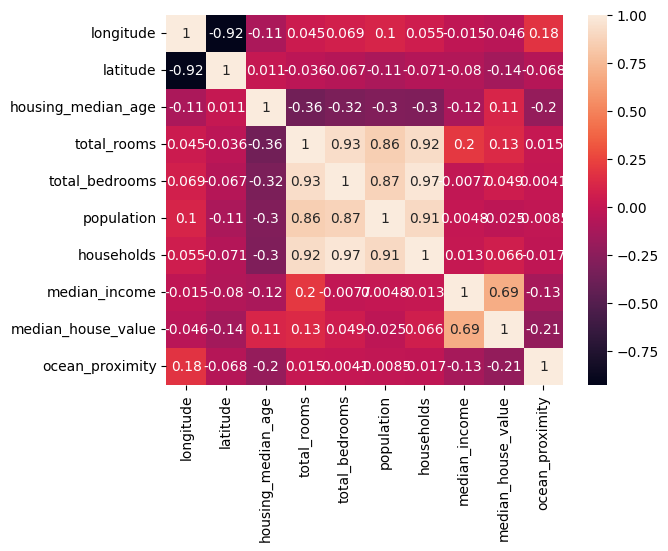

In [ ]:
heatmap =sns.heatmap(df.corr(), annot=True)

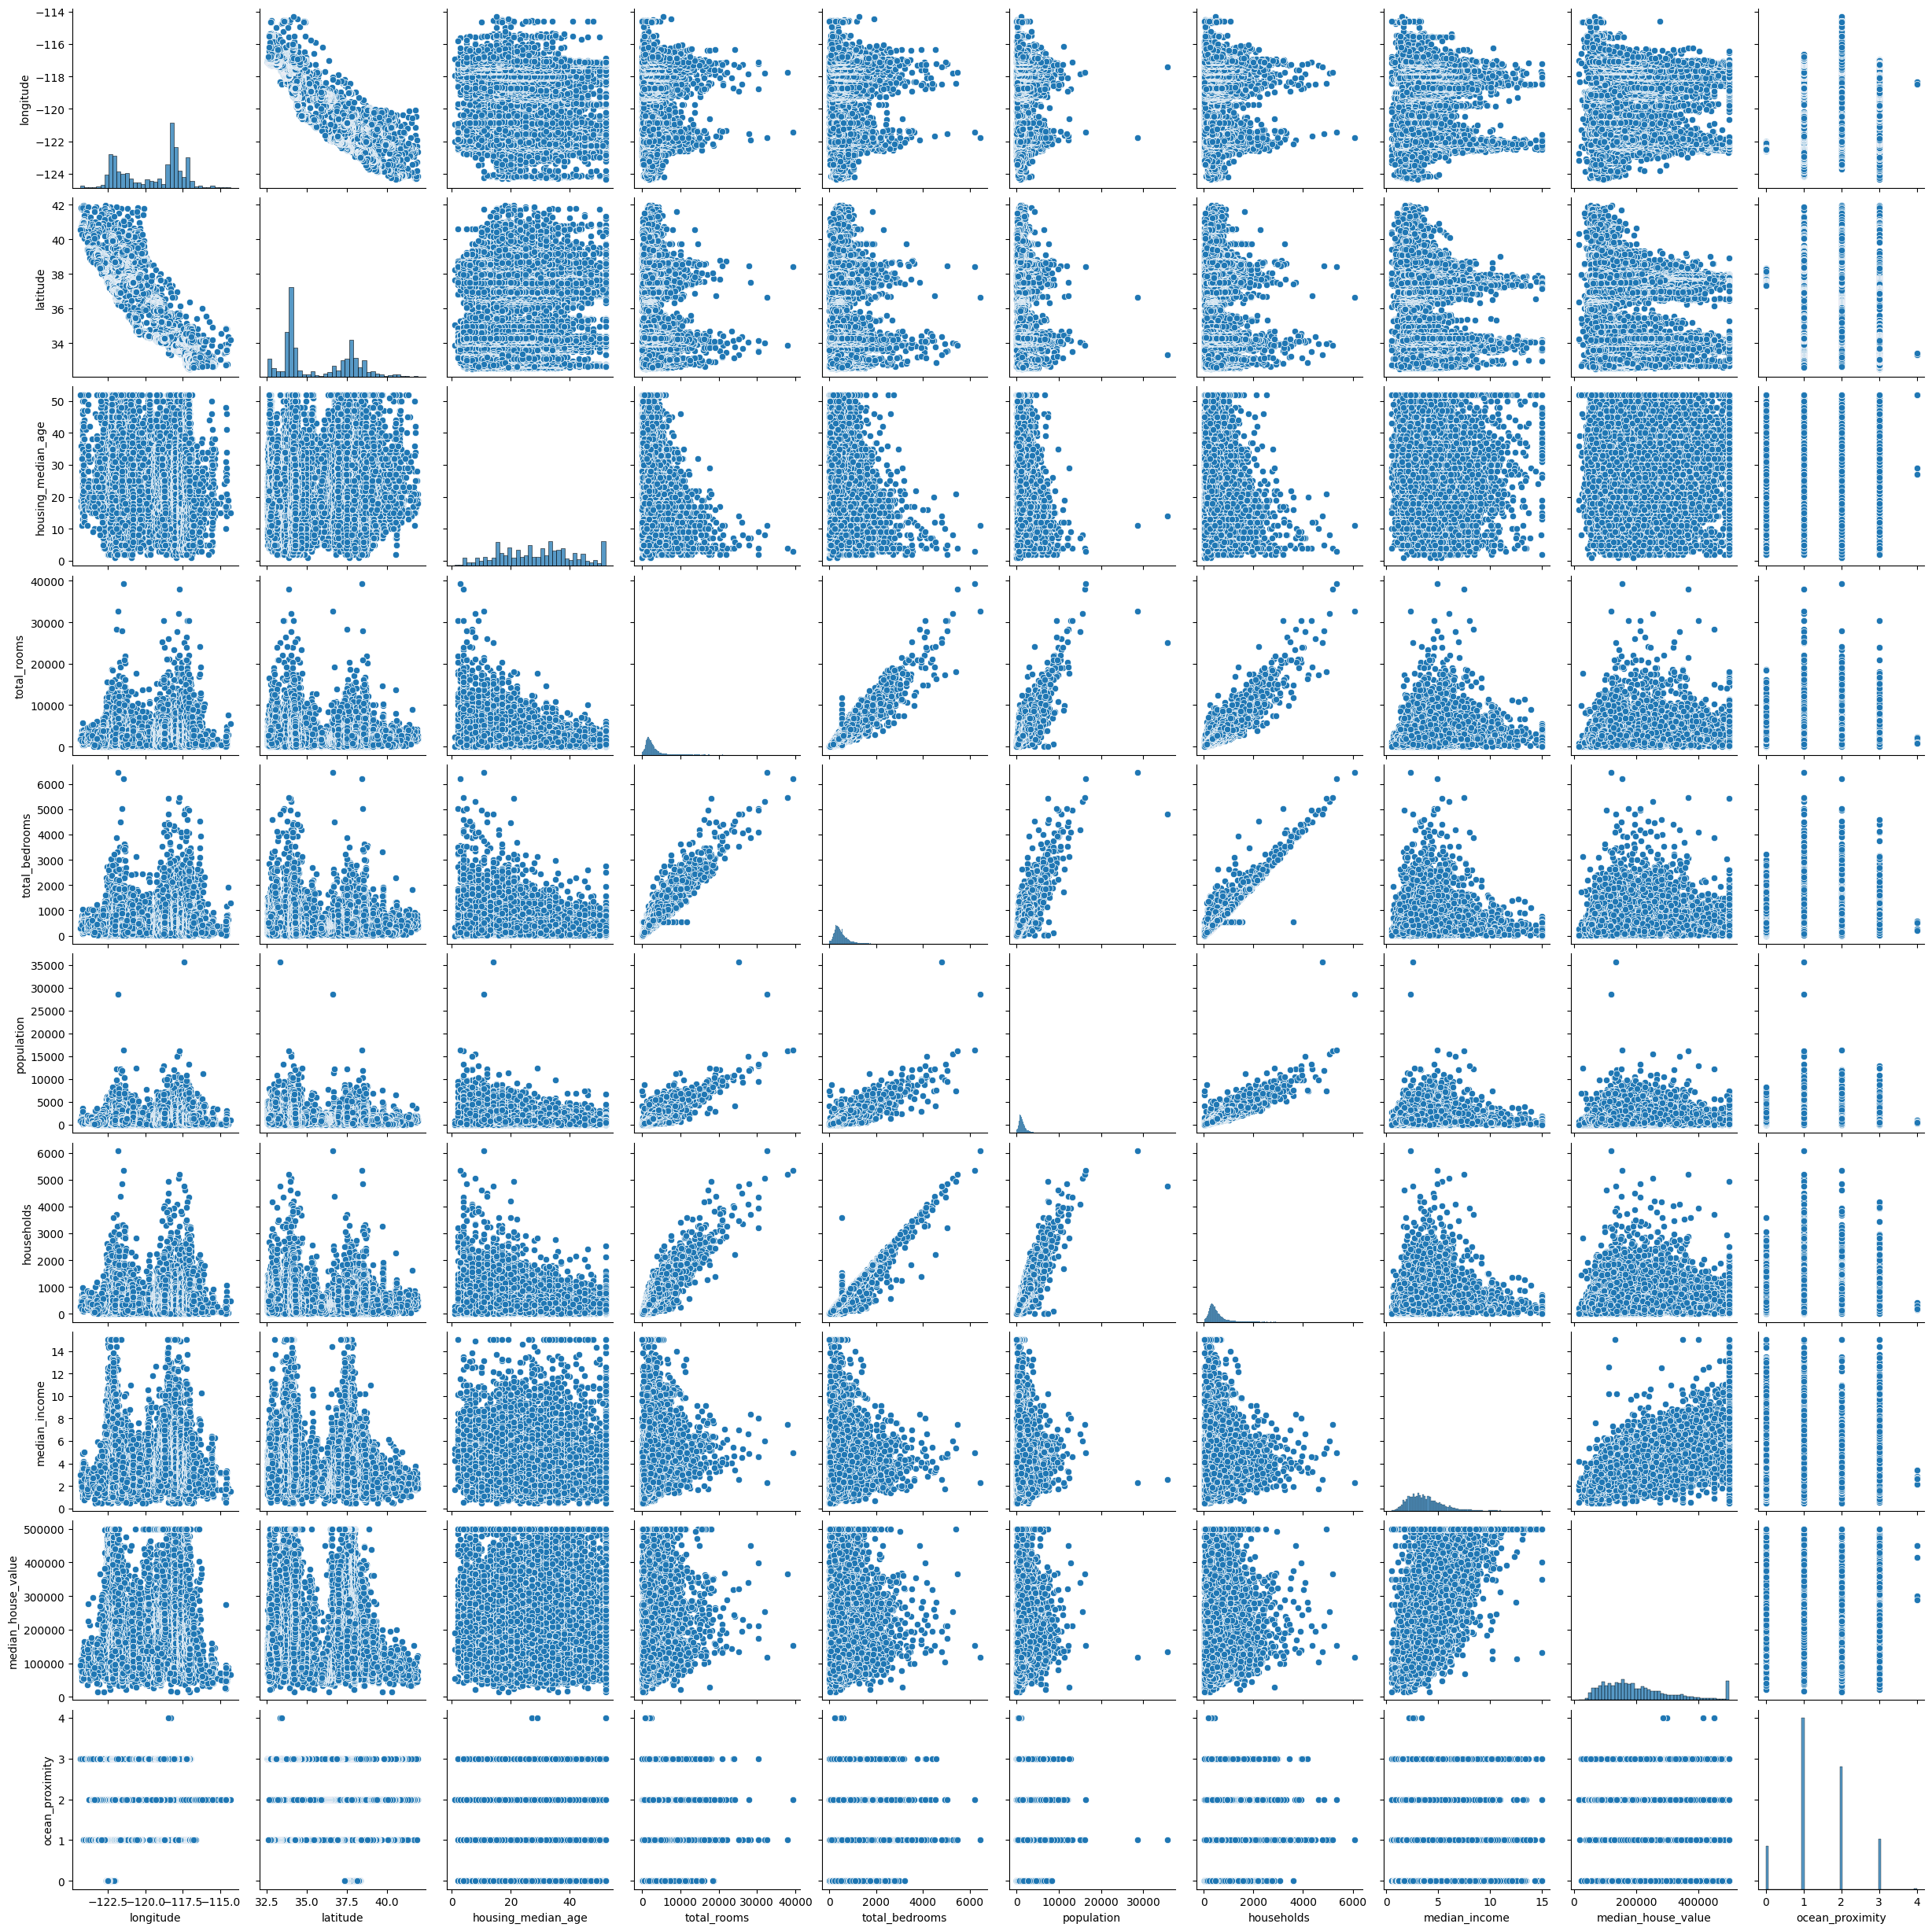

In [ ]:
sns.pairplot(df)

In [ ]:
# age vs charges seems fun to try

In [ ]:
X = df.total_bedrooms
Y =df.total_rooms

In [ ]:
X_train = X[:-10]
y_train = Y[:-10]
X_test = X[-10:]
y_test = Y[-10:]

In [ ]:
type(X_test.tail())

pandas.core.series.Series

In [ ]:
X_train

,total_bedrooms
0,129.0
1,1106.0
2,190.0
3,235.0
4,280.0
...,...
20625,17.0
20626,184.0
20627,65.0
20628,421.0


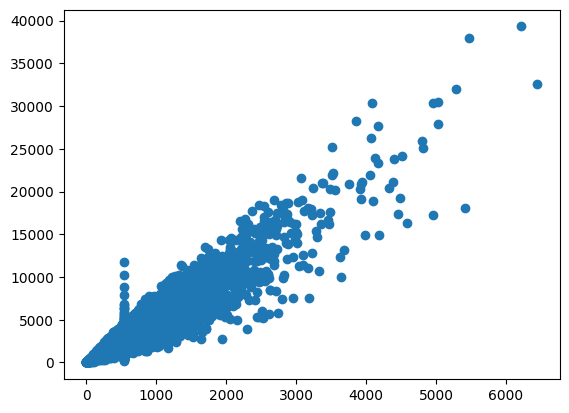

In [ ]:
plt.scatter(X_train,y_train)

In [ ]:
def loss(y_pred, y_actual):
  return np.mean((y_pred-y_actual)**2)

In [ ]:
# y= mx+ c : m -> slope ; c -> Intercept
# m and c visually

def plot_line(m,c):
  '''
  this function gives us the loss
  '''
  y_pred = [x*m + c for x in X_train]
  plt.plot(X_train, y_pred, color='red')

  plt.xlabel("total_bedrooms")
  plt.ylabel("Total_rooms")
  plt.scatter(X_train,y_train)
  print(f"""The loss is {np.round(loss(y_pred, y_train), 2)}  """)

interact(plot_line, m=(-20,20),c = (50, 50))

interactive(children=(IntSlider(value=0, description='m', max=20, min=-20), IntSlider(value=50, description='c…

<function __main__.plot_line(m, c)>

Hence we can see that best slope value = 5 and intercept = 50

In [ ]:
# we're adjusting b (intercept), moves the line up and down
def b_grad(x,y, m, b):
  diff = 0
  for i in range(len(x)):
    diff += (y[i]- (x[i]*m + b))
  return (-2/len(x))*diff

In [ ]:
# we're adjusting m(slope) the angle of the line
def m_grad(x,y, m, b):
  diff = 0
  for i in range(len(x)):
    diff += x[i]*(y[i]- (x[i]*m + b))
  return (-2/len(x))*diff

In [ ]:
#b and m are changed
'''b moves the line up/down by <lr> units and
  changes angle of line by <lr> units'''
def steps(x,y,m,b,lr):

  b -= b_grad(x,y,m,b)*lr
  m -= m_grad(x,y,m,b)*lr
  return [b,m]

In [ ]:
def gradient_descent(x,y,m,b,lr, num_iter):
  '''
   moves line in the "right"(minimal loss) direction and angle. Takes <num_iter> steps. It needs to converge within this number of steps.
  '''
  losses = []
  for i in range(num_iter):
    b,m = steps(x,y,m,b,lr)
    losses.append(loss(m * x[i] + b, y[i]))
  return b,m,losses


my intercept is: 2.003610034457006 
my slope is:  4.869544791749366
My loss is: 668113.5315101781


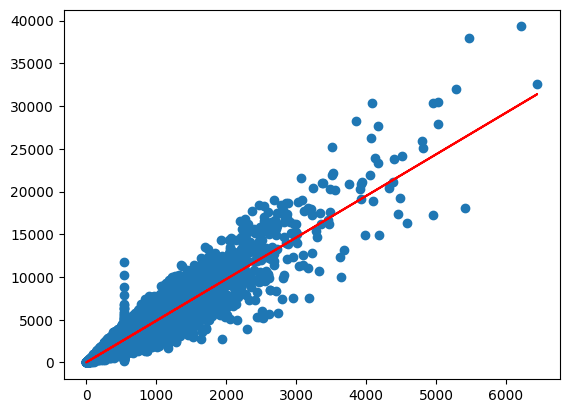

In [ ]:
num_iter = 10
lr =.000001
intercept,slope,losses = gradient_descent(X_train,y_train, 2,2, lr, num_iter)
y_line = [x*slope + intercept for x in X_train]
print(f"my intercept is: {intercept} \nmy slope is:  {slope}\nMy loss is: {loss(y_line, y_train)}")
plt.scatter(X_train,y_train)
plt.plot(X_train, y_line, color='red')

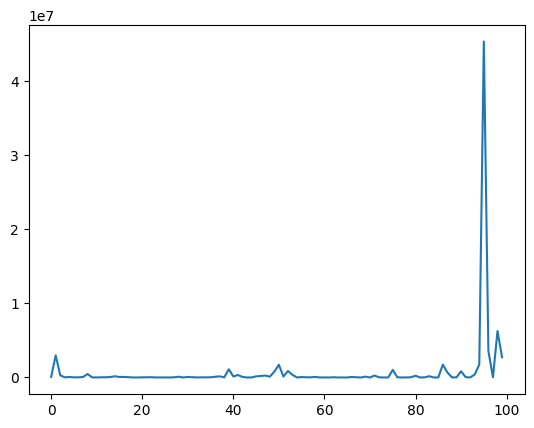

In [ ]:
plt.plot(range(num_iter),losses)

In [ ]:
y_pred_test = [x*slope + intercept for x in X_test]
print(f"my intercept is: {intercept} \nmy slope is:  {slope}\nMy loss is: {loss(y_pred_test, y_test)}")

my intercept is: 2.0062375513148862 
my slope is:  4.869541753545139
My loss is: 45402.67470006501


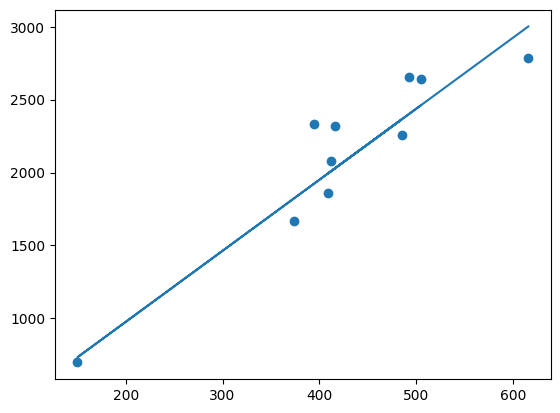

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_test)